In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.modeling import models, fitting

plt.style.use('default')

In [2]:
# Read in the data
comp_lamps_1 = fits.open('../ccd_calibrations/comp_1.fits')[0].data
comp_lamps_2 = fits.open('../ccd_calibrations/comp_2.fits')[0].data

centroid 410.7832301022882


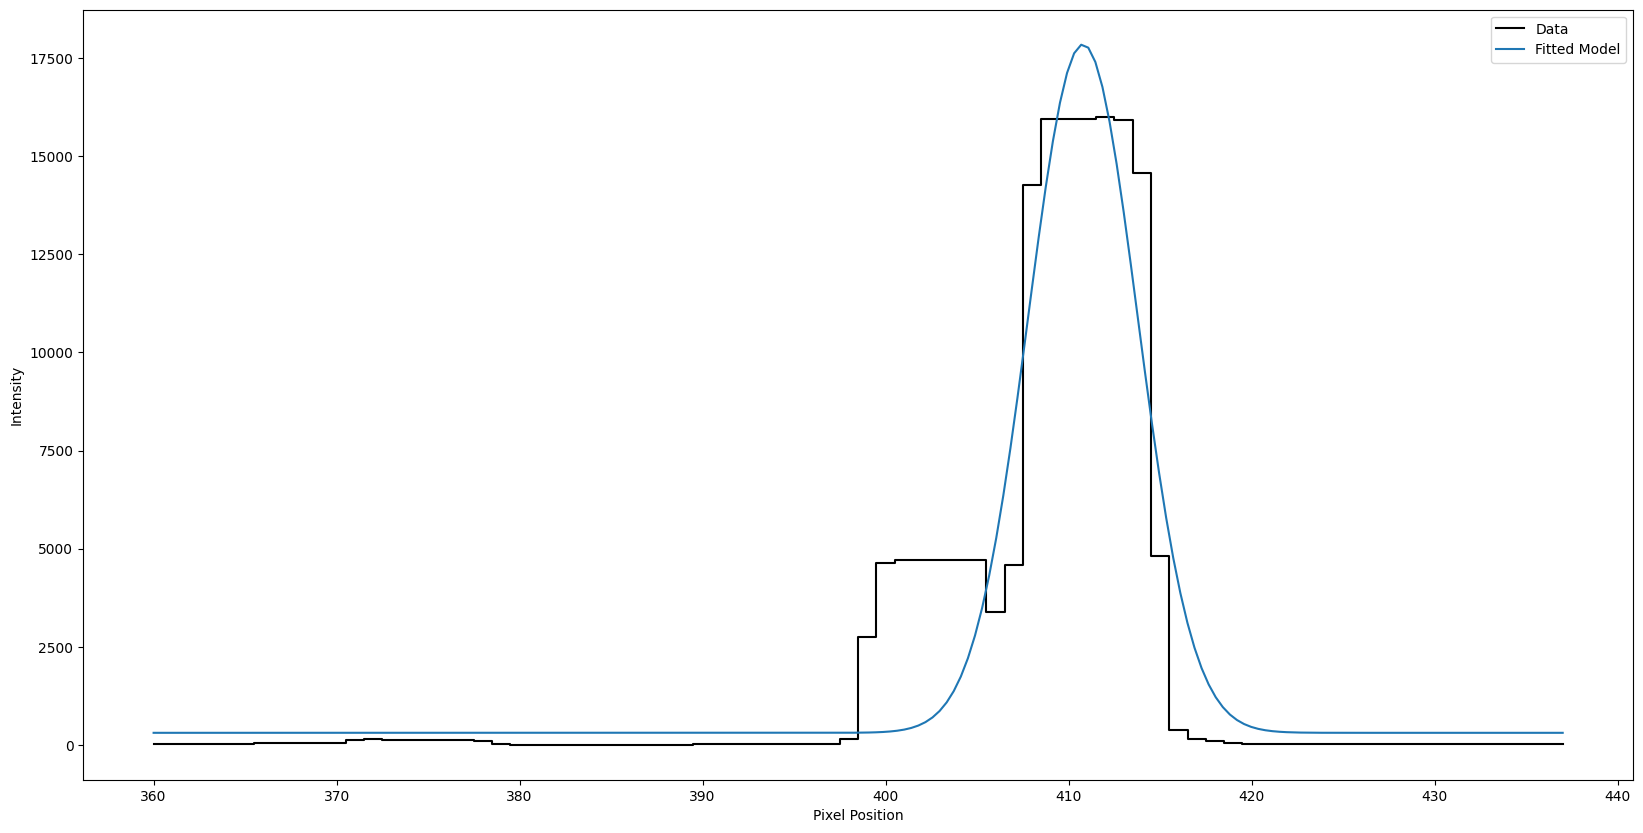

In [3]:
# COMP LAMPS 1 (LOW)
fitfunc = fitting.LevMarLSQFitter()

start = 360
stop = 438

x = np.arange(start, stop)
y = comp_lamps_1[start:stop, 924:1124].mean(axis=1)

line_model = models.Gaussian1D(amplitude=y.max(), mean=np.median(x), stddev=np.std(x)) + models.Const1D(
    amplitude=y.min())
fitted_line = fitfunc(line_model, x, y)

figL, axL = plt.subplots(figsize=(20, 10))
axL.step(x, y, label='Data', where='mid', color='black')
dummyx = np.linspace(x.min(), x.max(), 200)
axL.plot(dummyx, fitted_line(dummyx), '-', label='Fitted Model')
axL.set_ylabel("Intensity")
axL.legend()
axL.set_xlabel("Pixel Position")

print("centroid", fitted_line.mean_0.value)

# comp_1_starts_stops = [(0, 35), (35, 60), (95, 130), (130, 160), (160, 250), (250, 300), (295, 350), (360, 438), (430, 460)]
# comp_1_wavelengths = [6163.59, 6143.06, 6096.16, 6074.34, 6030, 59975.53, 5944.83, 5881.9, 5852.49]

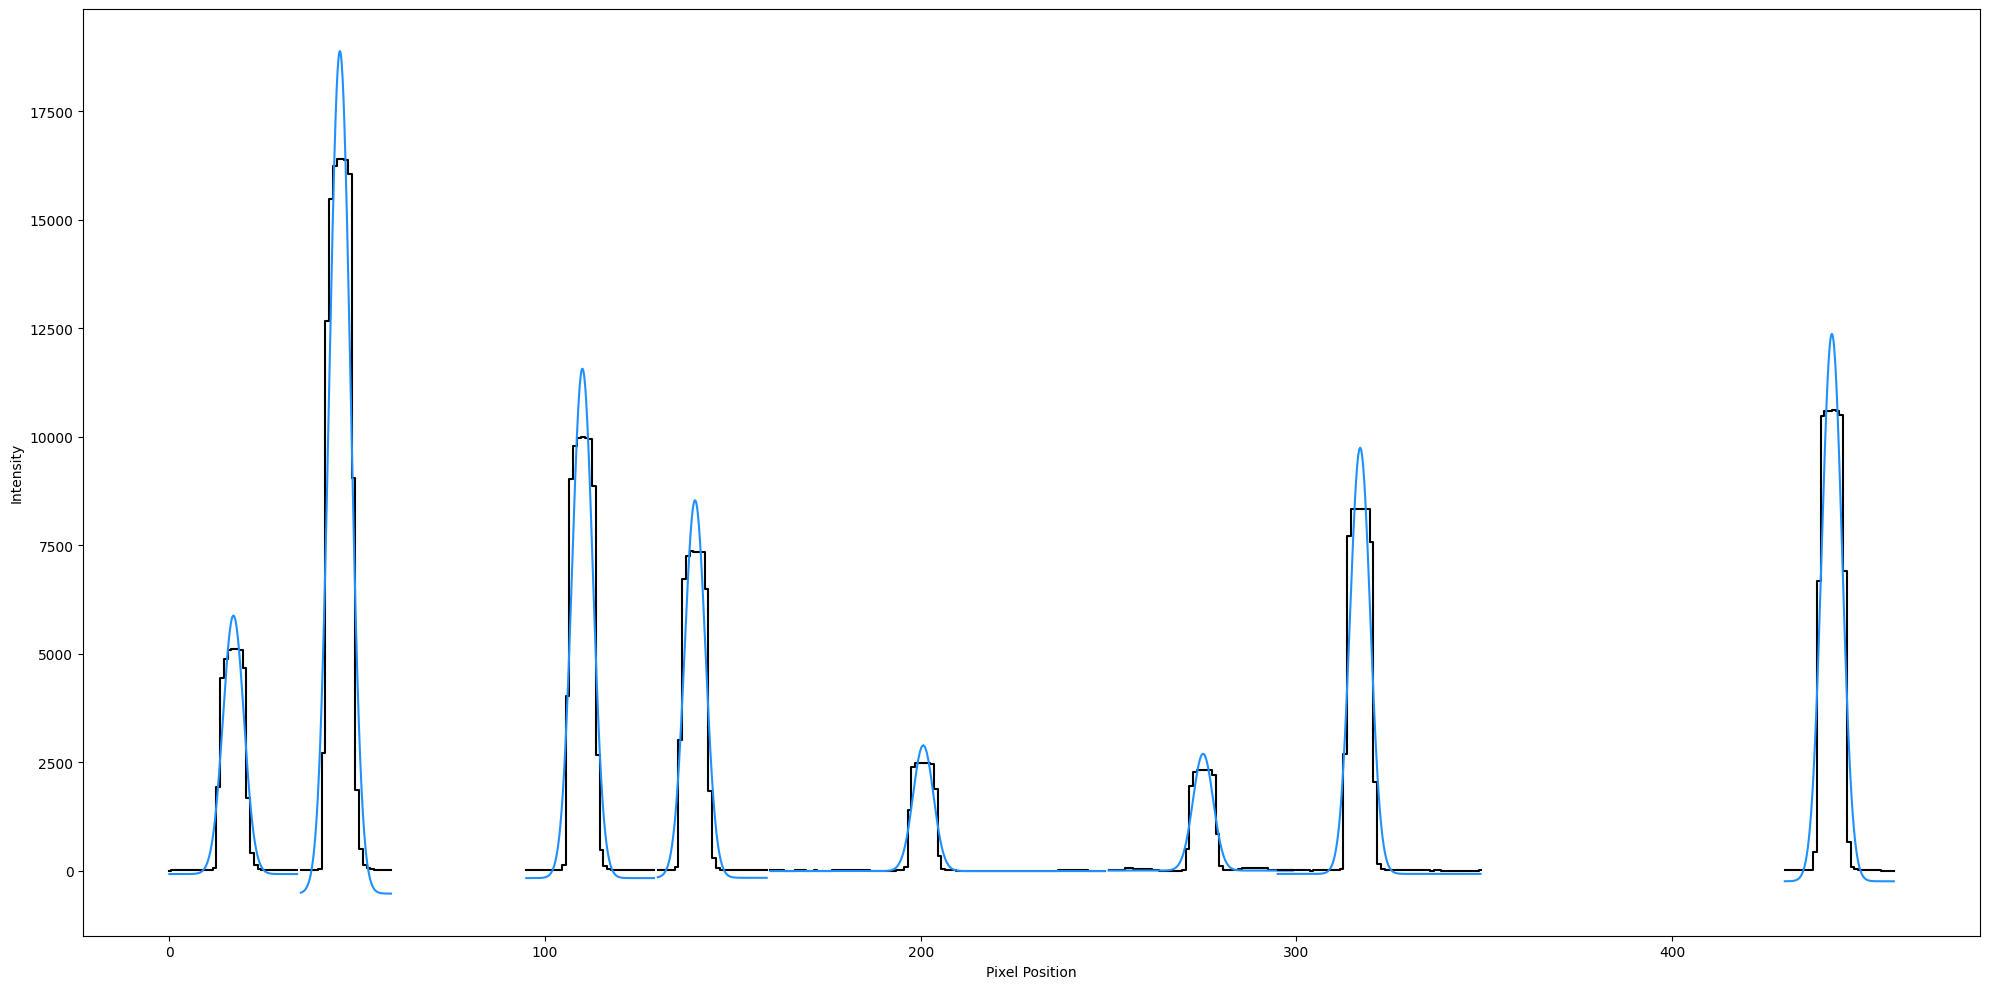

In [4]:
comp_1_starts_stops = [(0, 35), (35, 60), (95, 130), (130, 160), (160, 250), (250, 300), (295, 350), (430, 460)]
comp_1_wavelengths = [6163.59, 6143.06, 6096.16, 6074.34, 6030, 5975.53, 5944.83, 5852.49]
comp_1_centroids = []
comp_1_fwhm = []

fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex="all")

for idx, (start, stop) in enumerate(comp_1_starts_stops):
    x = np.arange(start, stop)
    y = comp_lamps_1[start:stop, 924:1124].mean(axis=1)

    line_model = models.Gaussian1D(amplitude=y.max(), mean=np.median(x),
                                   stddev=np.std(x)) + models.Const1D(amplitude=y.min())
    fitted_line = fitfunc(line_model, x, y)

    ax.step(x, y, label='Data', where='mid',
            color='black')  ## we use 'step' for the plotting to illustrate the discrete nature of the pixels
    dummyx = np.linspace(x.min(), x.max(),
                         200)  ## dummy variable for showing full shape of model function oversampling pixels
    ax.plot(dummyx, fitted_line(dummyx), '-', label='Fitted Model', color='dodgerblue')
    # print(fitted_line.mean_0.value)
    comp_1_centroids.append(fitted_line.mean_0.value)
    comp_1_fwhm.append(fitted_line.stddev_0.value * np.sqrt(np.log(256)))
ax.set_xlabel("Pixel Position")
ax.set_ylabel("Intensity")
fig.tight_layout()

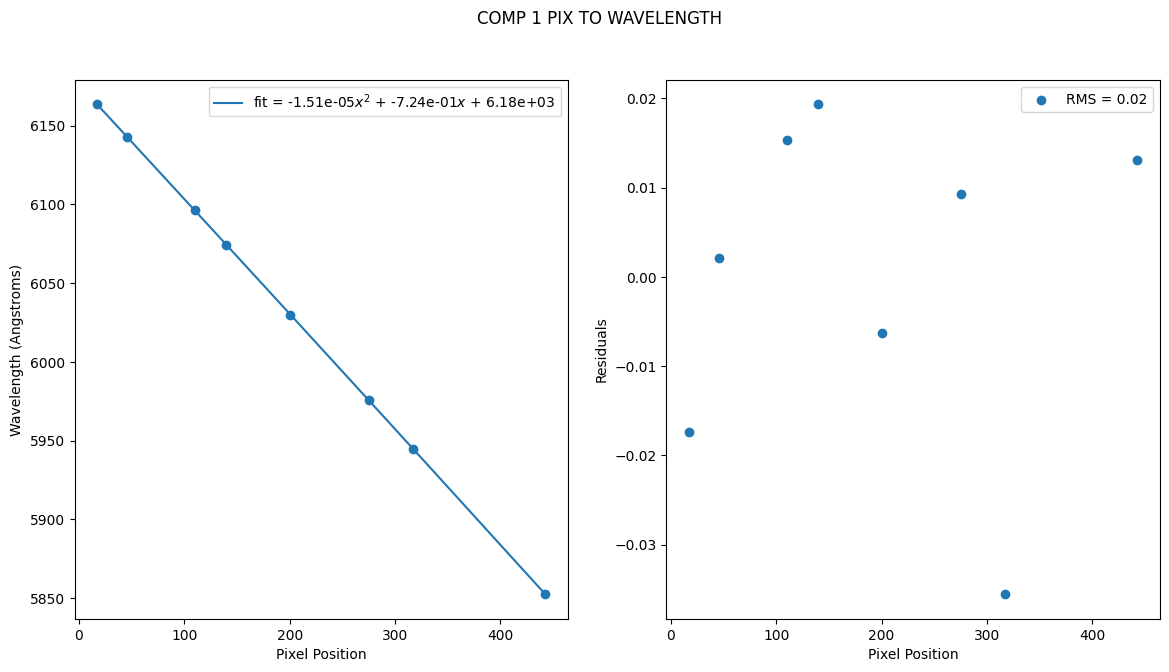

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].scatter(comp_1_centroids, comp_1_wavelengths)
comp_1_coef = np.polyfit(comp_1_centroids, comp_1_wavelengths, 2)
comp_1_pix_to_wavelength = np.poly1d(comp_1_coef)
ax[0].plot(comp_1_centroids, comp_1_pix_to_wavelength(comp_1_centroids),
           label=f'fit = {comp_1_coef[0]:.2e}$x^2$ + {comp_1_coef[1]:.2e}$x$ + {comp_1_coef[2]:.2e}')
ax[0].set_xlabel("Pixel Position")
ax[0].set_ylabel("Wavelength (Angstroms)")
ax[0].legend()
comp_1_residuals = comp_1_wavelengths - comp_1_pix_to_wavelength(comp_1_centroids)
ax[1].scatter(comp_1_centroids, comp_1_residuals, label=f'RMS = {np.std(comp_1_residuals):.2f}')
ax[1].set_xlabel("Pixel Position")
ax[1].set_ylabel("Residuals")
ax[1].legend()
fig.suptitle("COMP 1 PIX TO WAVELENGTH")
plt.savefig("../plots/comp_1_pix_to_wavelength.png", dpi=300)